#степик_Демо KarpovCourses Аналитик данных_мини-проект_2
Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.
Какой клиент совершил больше всего успешных операций? (success == True)
С какой платформы осуществляется наибольшее количество успешных операций?
Какую платформу предпочитают премиумные клиенты?
Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
Постройте график распределения числа успешных операций
Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?

Описание данных
user_data:

client – идентификатор пользователя
premium – является ли клиент премиум
age – возраст
logs:

client – идентификатор пользователя
success – результат (успех - 1, нет - 0)
platform – платформа
time – время в формате Unix

In [165]:
import pandas as pd

In [166]:
url_data = 'https://stepik.org/media/attachments/lesson/360348/user_data.csv'
url_logs = 'https://stepik.org/media/attachments/lesson/360348/logs.csv'

data = pd.read_csv(url_data)
# data.head()
data['num_nulls'] = data[['client','premium','age']].isnull().sum(axis=1)
data.head()

,client,premium,age,num_nulls
0,46346,False,58,0
1,4391,False,55,0
2,27372,False,64,0
3,11989,False,44,0
4,60664,False,49,0


In [167]:
data.describe() #х. В частности: количество, среднее,
#стандартное отклонение, минимальное, максимальное и 25-е, 
#50-е (медиана), 75-й процентили.

,client,age,num_nulls
count,2954.000000,2954.000000,2954.0
mean,50767.886594,44.196005,0.0
std,28800.505847,14.248336,0.0
min,40.000000,20.000000,0.0
25%,25639.500000,32.000000,0.0
50%,51569.500000,44.000000,0.0
75%,75963.250000,56.000000,0.0
max,99973.000000,69.000000,0.0


In [168]:
data.dtypes.value_counts()

int64    3
bool     1
dtype: int64

In [169]:
logs = pd.read_csv(url_logs)
logs.head()
logs['num_nulls'] = logs[['client','success','platform','time']].isnull().sum(axis=1)
logs.head()

,client,success,platform,time,num_nulls
0,40177,True,phone,1585412212,0
1,61468,True,phone,1585425658,0
2,35604,False,phone,1585459894,0
3,9961,True,phone,1585400189,0
4,10931,True,computer,1585468629,0


In [170]:
logs.describe()
# Сколько уникальных значений принимает переменная platform?
logs.platform.nunique()

3

In [171]:
logs.dtypes.value_counts()

int64     3
bool      1
object    1
dtype: int64

In [172]:
#Какой клиент совершил больше всего
#успешных операций? (success == True)
ss = logs.query('success ==True').groupby('client').agg({'platform':'count'}).sort_values('platform',ascending=False)
s = ss.max()
# s максим кол-во == 411
all = ss.query('platform ==41')
all

,platform
client,
12179,41
61468,41
52870,41
61473,41
92584,41
82563,41
78349,41
36165,41
28719,41


In [173]:

# 	platform
# client 	
# 12179, 61468, 52870, 61473, 92584, 82563, 78349, 36165, 28719

In [174]:
data

,client,premium,age,num_nulls
0,46346,False,58,0
1,4391,False,55,0
2,27372,False,64,0
3,11989,False,44,0
4,60664,False,49,0
...,...,...,...,...
2949,19411,False,29,0
2950,61579,False,50,0
2951,61221,True,64,0
2952,29863,False,46,0


In [175]:
spis = [12179, 61468, 52870, 61473, 92584, 82563, 78349, 36165, 28719]
spis.sort()

In [176]:
# С какой платформы осуществляется наибольшее количество
# успешных операций? 
ss = logs.query('success ==True').platform.value_counts()
ss

phone       2019
computer    1090
tablet       180
Name: platform, dtype: int64

In [177]:
data

,client,premium,age,num_nulls
0,46346,False,58,0
1,4391,False,55,0
2,27372,False,64,0
3,11989,False,44,0
4,60664,False,49,0
...,...,...,...,...
2949,19411,False,29,0
2950,61579,False,50,0
2951,61221,True,64,0
2952,29863,False,46,0


In [178]:
# Какую платформу предпочитают премиумные клиенты?
data_big = data.merge(logs)
data_big.query('premium==True').platform.value_counts()
# data_big

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

In [179]:
# Визуализируйте распределение возраста клиентов в зависимости от типа клиента
# (премиум или нет) Постройте график распределения числа успешных операций 
# Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от
# возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого 
# возраста совершили наибольшее количество успешных действий?
data_big
# Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет),
# используя библиотеку seaborn с исходными параметрами. Какой график получится в результате?

# Используйте датасэт, который вы получили на предыдущем шаге

,client,premium,age,num_nulls,success,platform,time
0,46346,False,58,0,True,phone,1585452839
1,4391,False,55,0,False,phone,1585409861
2,27372,False,64,0,False,phone,1585446018
3,11989,False,44,0,True,computer,1585403698
4,60664,False,49,0,True,phone,1585406918
...,...,...,...,...,...,...,...
3434,19411,False,29,0,True,phone,1585400902
3435,61579,False,50,0,True,phone,1585436158
3436,61221,True,64,0,True,phone,1585440218
3437,29863,False,46,0,True,tablet,1585443437


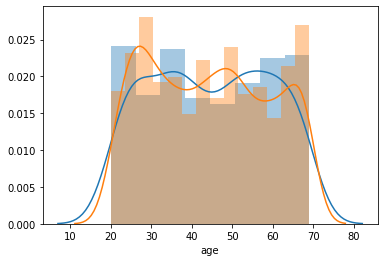

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(data_big.query('premium == True').age)
sns.distplot(data_big.query('premium == False').age)

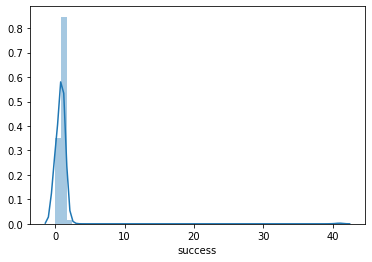

In [181]:
suc_n=data_big.groupby('client').agg({'success':'sum'})
sns.distplot(suc_n.success)
# suc_n


In [182]:
suc_n_2 = data_big.query('platform == "computer"')
suc_n_2

,client,premium,age,num_nulls,success,platform,time
3,11989,False,44,0,True,computer,1585403698
12,32406,False,24,0,True,computer,1585479382
14,62404,False,40,0,True,computer,1585430097
20,68848,False,35,0,True,computer,1585440553
23,74867,True,27,0,False,computer,1585452086
...,...,...,...,...,...,...,...
3415,13688,True,66,0,True,computer,1585453923
3417,68348,False,69,0,True,computer,1585456739
3427,9450,False,34,0,True,computer,1585446079
3430,61851,False,31,0,True,computer,1585473042


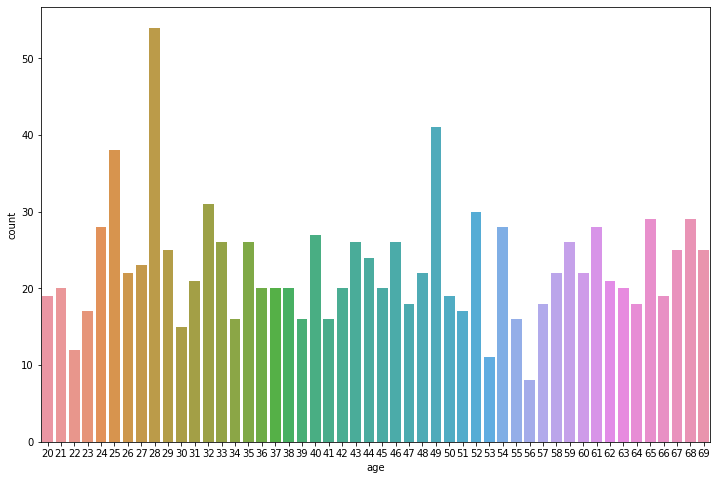

In [183]:
 plt.figure(figsize=(12, 8))
sns.countplot(suc_n_2.age)